# Forest Growth Remote Sensing Detector <br>

This Jupyter Notebook guides the developin

In [15]:
# We start importing the main scripts of the project
from lib.data import data_loading
from lib.visuals import image_utils
from lib.model import preprocess
import numpy as np

In [16]:
# We start leading the images
main_folder_path = 'lib/data/fotos_remote_sensing'
data_dict = data_loading.load_images(main_folder_path)

['001.batch_0', '002.batch_10', '003.batch_20', '004.batch_30', '005.batch_40', '006.batch_50', '007.batch_60', '009.batch_80', '010.batch_90']
[7 2 1 4 8 6 3 0 5]
['001.batch_0', '002.batch_10', '003.batch_20', '004.batch_30', '005.batch_40', '006.batch_50', '007.batch_60', '009.batch_80', '010.batch_90']
['001.batch_0', '002.batch_10', '003.batch_20', '004.batch_30', '005.batch_40', '006.batch_50', '007.batch_60', '009.batch_80', '010.batch_90']
[7 2 1 4 8 6 3 0 5]
['001.batch_0', '002.batch_10', '003.batch_20', '004.batch_30', '005.batch_40', '006.batch_50', '007.batch_60', '009.batch_80', '010.batch_90']
['001.batch_0', '002.batch_10', '003.batch_20', '004.batch_30', '005.batch_40', '006.batch_50', '007.batch_60', '009.batch_80', '010.batch_90']
[7 2 1 4 8 6 3 0 5]
['001.batch_0', '002.batch_10', '003.batch_20', '004.batch_30', '005.batch_40', '006.batch_50', '007.batch_60', '009.batch_80', '010.batch_90']
e_sensing/train/001.batch_0
e_sensing/train/002.batch_10
e_sensing/train/003

   ## Files dictionary
   data_dict['train_files'] = train_files <br>
   data_dict['train_targets'] = train_targets <br>
   data_dict['valid_files'] = valid_files <br>
   data_dict['valid_targets'] = valid_targets <br>
   data_dict['test_files'] = test_files <br>
   data_dict['test_targets'] = test_targets <br>

lib/data/fotos_remote_sensing/train/009.batch_80/pol_9.png


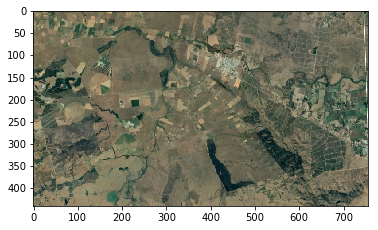

lib/data/fotos_remote_sensing/train/003.batch_20/pol_3.png


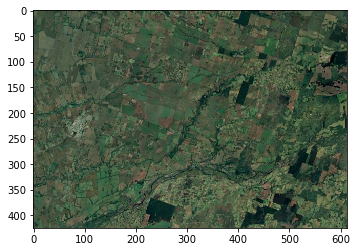

lib/data/fotos_remote_sensing/train/002.batch_10/pol_2.png


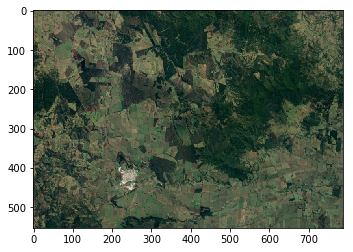

lib/data/fotos_remote_sensing/train/005.batch_40/pol_5.png


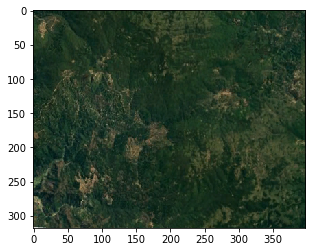

lib/data/fotos_remote_sensing/train/010.batch_90/pol_10.png


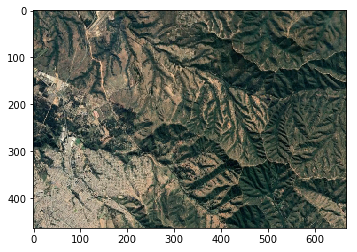

lib/data/fotos_remote_sensing/train/007.batch_60/pol_7.png


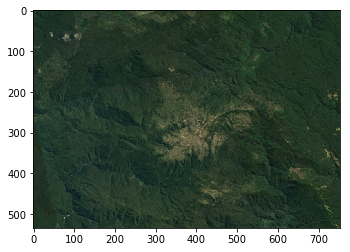

lib/data/fotos_remote_sensing/train/004.batch_30/pol_4.png


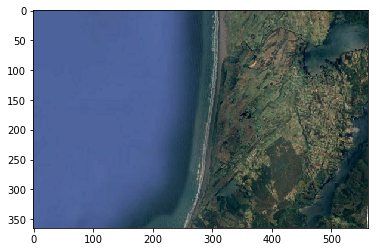

lib/data/fotos_remote_sensing/train/001.batch_0/pol_1.png


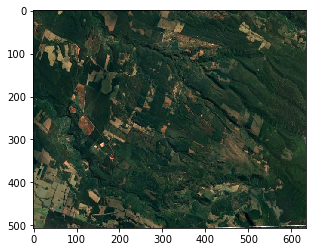

lib/data/fotos_remote_sensing/train/006.batch_50/pol_6.png


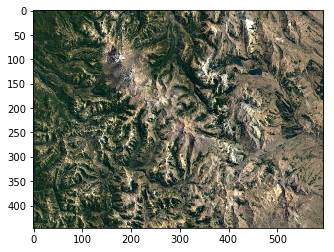

In [17]:
#Once we have the data loaded, we visualize some to know if it is right
image_utils.show_images(data_dict['train_files'])

## Pre-process the Data
We rescale the images by dividing every pixel in every image by 255.

In [18]:
train_tensor= preprocess.paths_to_tensor(data_dict['train_files'])
valid_tensor= preprocess.paths_to_tensor(data_dict['valid_files'])
test_tensor= preprocess.paths_to_tensor(data_dict['test_files'])

100%|██████████| 9/9 [00:00<00:00, 50.75it/s]


## Start testing with a first network architechture
Here we will play with the architechture tunning

In [20]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D(data_format=None))
model.add(Dense(9, activation='softmax')) # I added a 9 nodes layer to represent 9 different forest cover batches

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 64)               

## Compile the Model

In [21]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(data_dict['train_targets'])
print(data_dict['valid_targets'])

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


## Train the model

In [9]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensor, data_dict['train_targets'], 
          validation_data=(valid_tensor, data_dict['valid_targets']),
          epochs=epochs, batch_size=2, callbacks=[checkpointer], verbose=1)

Train on 9 samples, validate on 9 samples
Epoch 1/5
9/9 [==============================] - 1s 65ms/step - loss: 2.2357 - accuracy: 0.1111 - val_loss: 2.1949 - val_accuracy: 0.2222

Epoch 00001: val_loss improved from inf to 2.19489, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
9/9 [==============================] - 0s 38ms/step - loss: 2.2086 - accuracy: 0.1111 - val_loss: 2.1923 - val_accuracy: 0.2222

Epoch 00002: val_loss improved from 2.19489 to 2.19234, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
9/9 [==============================] - 0s 37ms/step - loss: 2.2040 - accuracy: 0.1111 - val_loss: 2.1900 - val_accuracy: 0.1111

Epoch 00003: val_loss improved from 2.19234 to 2.18999, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
9/9 [==============================] - 0s 37ms/step - loss: 2.2001 - accuracy: 0.1111 - val_loss: 2.1863 - val_accuracy: 0.1111

Epoch 00004: val_loss improved from 2.18999 to 2.18626, sa

### Load the Model with the Best Validation Loss

In [10]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [11]:
# get index of predicted dog breed for each image in test set
green_cover_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensor]

# report test accuracy
test_accuracy = 100*np.sum(np.array(green_cover_predictions)==np.argmax(data_dict['test_targets'], axis=1))/len(green_cover_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

# We will print the predictions:
print(data_dict['train_targets'])
print(green_cover_predictions)

Test accuracy: 11.0000%
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[7, 7, 7, 2, 7, 2, 7, 7, 7]
